## Hypothesis: photo amount influences adoption speed

In [3]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import dexplot as dxp

# Modelling
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

# from ydata_profiling import ProfileReport

# import custom functions
from custom_functions import our_metrics

pd.set_option('display.max_rows', 10)

In [4]:
# plot settings

# custom color palette: 
#colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
#365b6d - dark blue
#41c1ba - turquoise
#289dd2 - medium blue
#6c9286 - muddy green
#fa9939 - orange 
#f2f1ec - off-white

# Set your custom color palette

#sns.set(style="white", rc={"axes.facecolor": "#f2f1ec", "figure.facecolor": "#f2f1ec"}) 
#custom_palette = sns.set_palette(sns.color_palette(colors))
#sns.set_palette(sns.color_palette(colors))

# for multiple plots
# sns.despine(left=True, bottom=True)

In [85]:
# set seaborn options globally
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
custom_palette = sns.set_palette(sns.color_palette(colors))
custom_params = {"axes.facecolor": "#f2f1ec", 
"figure.facecolor": "#f2f1ec",
'figure.titleweight': 'bold',
'figure.titlesize': 28,#'large',
'grid.alpha': 1.0,
'font.size': 16.0,
'font.weight': 'bold',
'axes.labelsize': 16,
'axes.labelcolor': '#365b6d',
'axes.titlepad': 10.0,
'axes.titlesize': 'large',
'xtick.labelsize': 16,
'xtick.color': '#365b6d',
'xtick.bottom': True,
'ytick.labelsize': 16,
'ytick.color': '#365b6d',
'ytick.left': True,
'text.color' : '#365b6d',
'legend.labelcolor': '#365b6d',
'legend.title_fontsize': 12.0,
'legend.frameon': False,
'axes.linewidth': 3,#0.8,
'axes.spines.left': True,
'axes.spines.bottom': True,
'axes.spines.right': True,
'axes.spines.top': True,
'axes.edgecolor': '#365b6d',
'axes.labelweight': 'bold',
'axes.titleweight': 'bold',
}
sns.set_theme(style="white", palette=colors, rc=custom_params)

In [6]:
df = pd.read_csv("../data/petfinder-adoption-prediction/eda/df_eda.csv")

In [7]:
df_combined = df.copy()
df_combined.adoptionspeed = df_combined.adoptionspeed.replace([1,2,3,4],['adopted', 'adopted','adopted','not adopted'])

In [8]:
df_combined.adoptionspeed.value_counts()

adoptionspeed
adopted        10796
not adopted     4197
Name: count, dtype: int64

In [9]:
df.adoptionspeed.value_counts()

adoptionspeed
4    4197
2    4037
1    3500
3    3259
Name: count, dtype: int64

In [10]:
pd.crosstab(df["photoamt"], df["adoptionspeed"],normalize="index")

adoptionspeed,1,2,3,4
photoamt,,,,
0.0,0.170088,0.105572,0.099707,0.624633
1.0,0.224390,0.254634,0.192520,0.328455
2.0,0.240667,0.264098,0.196982,0.298253
3.0,0.253286,0.265233,0.193947,0.287535
4.0,0.249335,0.276449,0.213716,0.260500
...,...,...,...,...
26.0,0.100000,0.200000,0.500000,0.200000
27.0,0.333333,0.166667,0.333333,0.166667
28.0,0.142857,0.000000,0.714286,0.142857


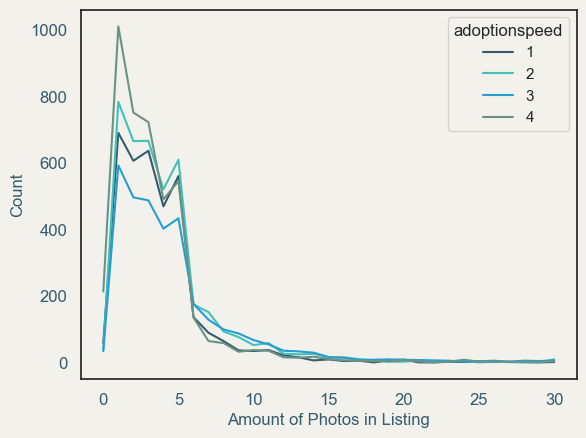

In [11]:
pd.crosstab(df["photoamt"], df["adoptionspeed"]#,normalize="index"
).plot.line()
plt.xlabel('Amount of Photos in Listing', color='#365b6d', fontsize=12)
plt.ylabel('Count', fontsize=12, color='#365b6d')

#plt.title(' Model', fontsize=28, color='#365b6d', pad=60, y=0.91) 
plt.xticks(color='#365b6d',fontsize=12)
plt.yticks(color='#365b6d', fontsize=12);
#sns.lineplot(x=quantile_idx, y=[0,5])
#plt.savefig('plots/baseline_plot2_without_title.jpg')

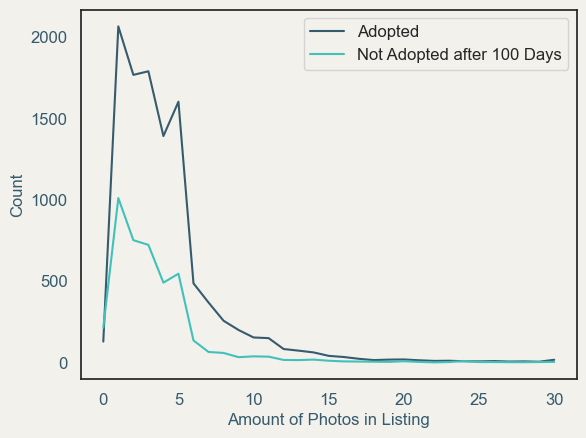

In [12]:
pd.crosstab(df_combined["photoamt"], df_combined["adoptionspeed"]#,normalize="index"
).plot.line()
plt.legend(
#    title='Adoption Speed',
    labels = ['Adopted', 'Not Adopted after 100 Days'],
    fontsize=12,#'x-large',
#    title_fontsize=20#'xx-large'
    )
plt.xlabel('Amount of Photos in Listing', color='#365b6d', fontsize=12);
plt.ylabel('Count', fontsize=12, color='#365b6d');
#plt.title(' Model', fontsize=28, color='#365b6d', pad=60, y=0.91) 
plt.xticks(color='#365b6d',fontsize=12)
plt.yticks(color='#365b6d', fontsize=12);

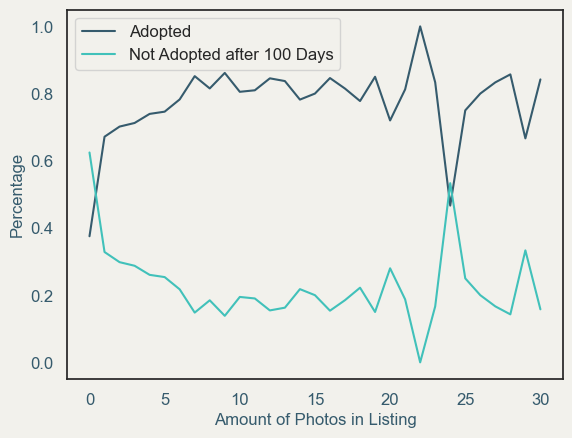

In [13]:
pd.crosstab(df_combined["photoamt"], df_combined["adoptionspeed"],normalize="index"
).plot.line()
plt.legend(
#    title='Adoption Speed',
    labels = ['Adopted', 'Not Adopted after 100 Days'],
    fontsize=12,#'x-large',
#    title_fontsize=20#'xx-large'
    )
plt.xlabel('Amount of Photos in Listing', color='#365b6d', fontsize=12);
plt.ylabel('Percentage', fontsize=12, color='#365b6d');
#plt.title(' Model', fontsize=28, color='#365b6d', pad=60, y=0.91) 
plt.xticks(color='#365b6d',fontsize=12)
plt.yticks(color='#365b6d', fontsize=12);

In [14]:
sns.color_palette()

[(0.21176470588235294, 0.3568627450980392, 0.42745098039215684),
 (0.2549019607843137, 0.7568627450980392, 0.7294117647058823),
 (0.1568627450980392, 0.615686274509804, 0.8235294117647058),
 (0.4235294117647059, 0.5725490196078431, 0.5254901960784314),
 (0.9490196078431372, 0.9450980392156862, 0.9254901960784314),
 (0.9803921568627451, 0.6, 0.2235294117647059)]

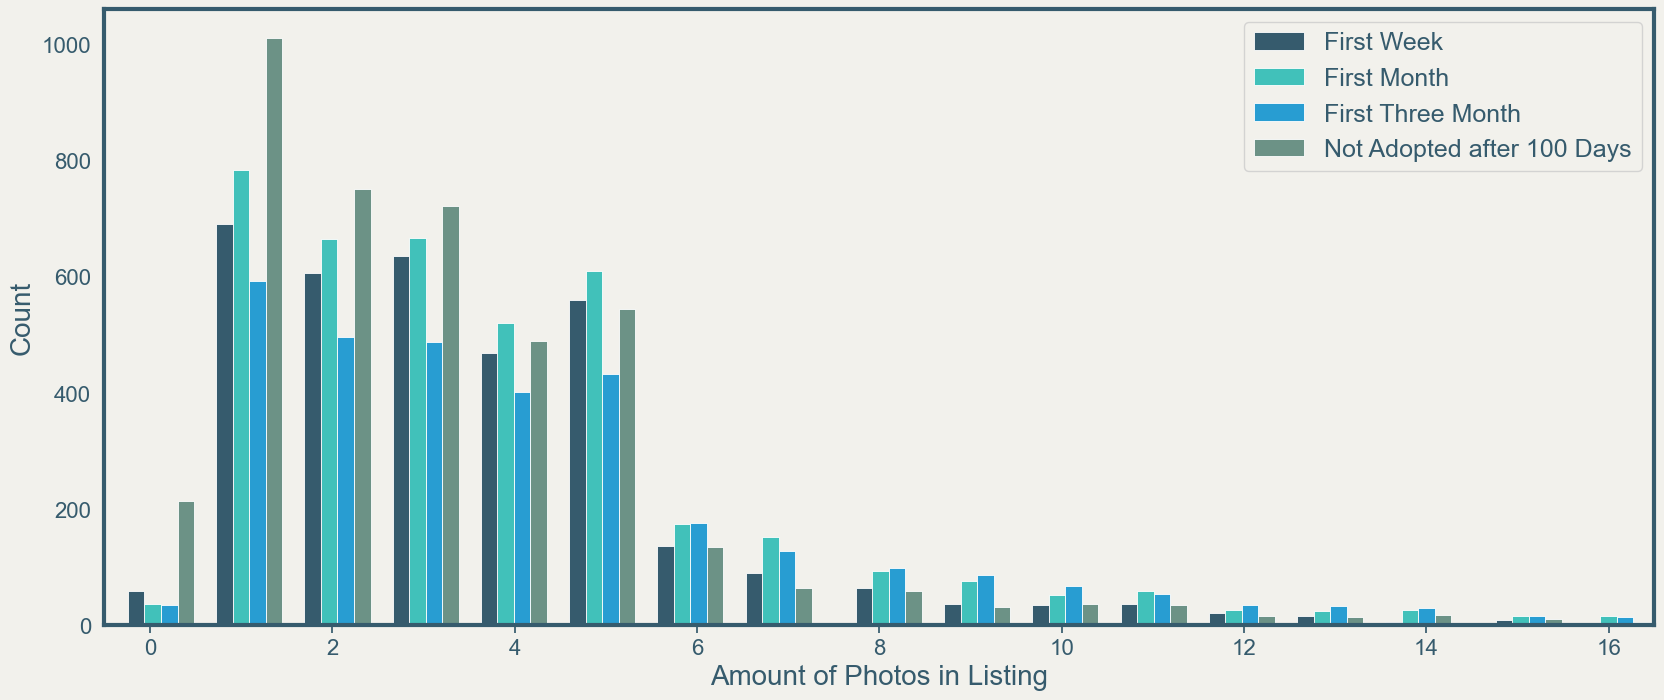

In [16]:
# histplot
bbox = dict(boxstyle="round", fc='#41c1ba')#fc="0.8") box for annotations
fig = plt.figure(figsize=(20,8))
hist = sns.histplot(
    data=df, 
    x='photoamt', 
    hue='adoptionspeed', 
    palette=['#365b6d', '#41c1ba', '#289dd2', '#6c9286'], 
    multiple='dodge', 
    alpha=1,
    shrink=3)#, palette=custom_palette, 
#, shrink=1, bins=20 )
#multiple='stack',“layer”, “dodge”, “fill”}
#plt.subplots_adjust(top=0.90)
#add legend to plot
plt.legend(
#    title='Adoption Speed',
    labels = ['Not Adopted after 100 Days','First Three Month','First Month','First Week'],
    reverse=True,
    fontsize=18,#'x-large',
    labelcolor="#365b6d",#'linecolor'
#    title_fontsize=20#'xx-large',
    #leg._legend_title_box._text.set_color('#FFFFFF')
    )
# legend = hist.legend(title="Adoption Speed", loc="upper right",frameon=False, labelcolor='#365b6d')
# legend.get_title().set_color('#365b6d')
# legend.get_title().set_fontweight('bold')
# labellist = ['Not Adopted after 100 Days','First Three Month','First Month','First Week']
# for i,label in enumerate(legend.get_texts()):
#     label.set_weight('bold')
#     label.set_text(labellist[i])
plt.xlabel('Amount of Photos in Listing', fontsize=20, color='#365b6d');
plt.ylabel('Count', fontsize=20, color='#365b6d');
#plt.title('Adoption Speed', fontsize=28, color='#365b6d', pad=60, y=0.91) 
plt.xticks(ticks=np.linspace(0,18,10),color='#365b6d',fontsize=16)
plt.tick_params(axis="x", bottom=True, colors='#365b6d')

#change color and width of frame
hist.spines['top'].set_visible(True)
hist.spines['top'].set_linewidth(3)
hist.spines['top'].set_color('#365b6d')  

hist.spines['right'].set_visible(True)
hist.spines['right'].set_linewidth(3)
hist.spines['right'].set_color('#365b6d')  

hist.spines['bottom'].set_linewidth(3)
hist.spines['bottom'].set_color('#365b6d')  

hist.spines['left'].set_linewidth(3)
hist.spines['left'].set_color('#365b6d') 

#change color and size of yticks
plt.yticks(color='#365b6d', fontsize=16)
# add vertical line
#sns.lineplot(x=3.5, y=[0,1050],color='#365b6d',marker='o',linestyle='dashed', linewidth=2, markersize=8)
# hist.axvline(x=3.52, ymin=0, ymax=1070, linewidth=3.5, linestyle='dashed')
# # Annotate vline
# plt.annotate("'Not Adopted' most frequent for up to 3 photos", xy=(3.7, 950), bbox=bbox, fontsize=20)
# plt.annotate("'Fast Adoption Speeds' most frequent for more than 3 photos", xy=(3.7, 800), bbox=bbox, fontsize=20)

#restrict x axis
plt.xlim([-0.5, 16.5])
# safe figure as...
#plt.savefig('../images/presentation/photoamt_with_line.jpg')
plt.savefig('../images/presentation/photoamt.jpg')
plt.show();

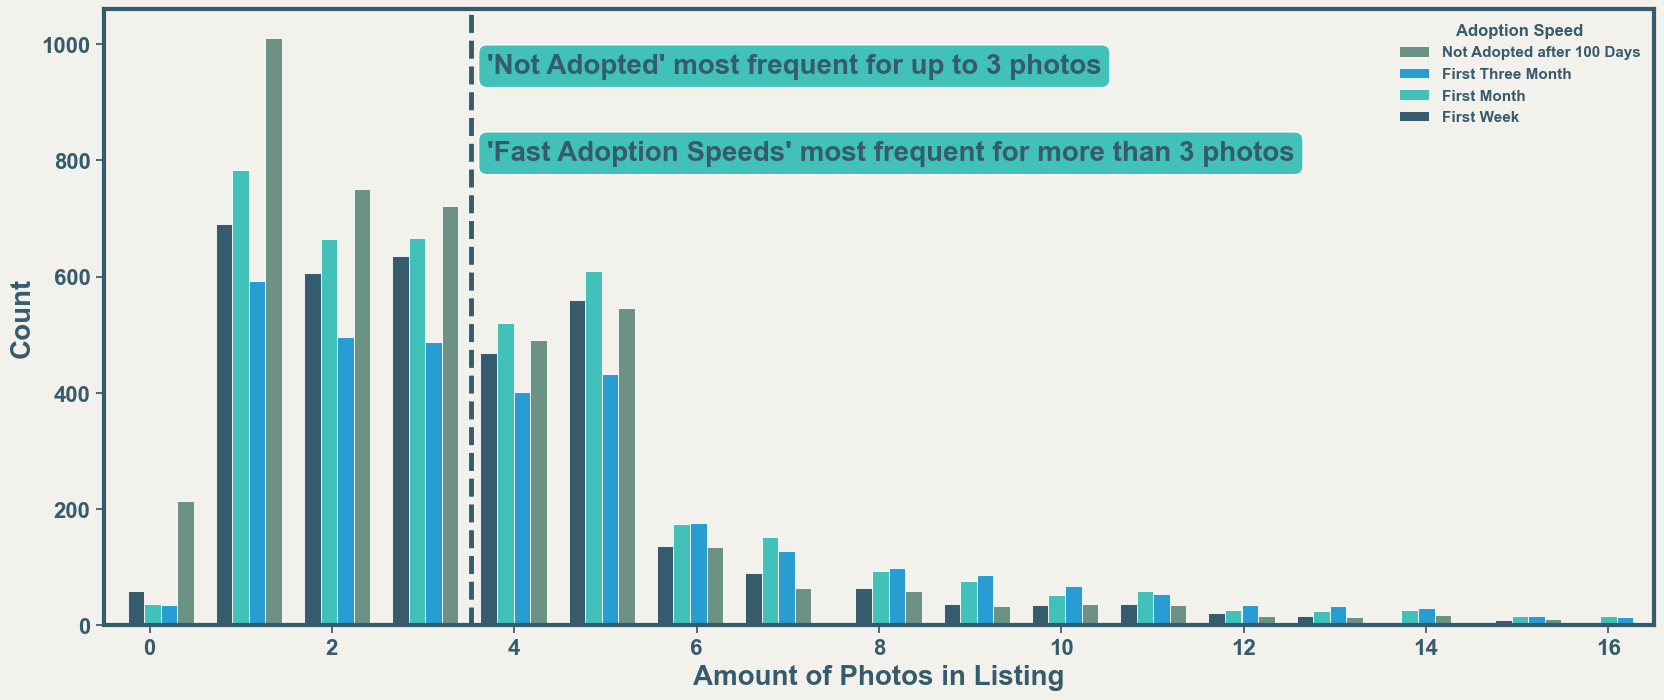

In [66]:
# histplot
bbox = dict(boxstyle="round", fc='#41c1ba')#fc="0.8") box for annotations
fig = plt.figure(figsize=(20,8))
hist = sns.histplot(
    data=df, 
    x='photoamt', 
    hue='adoptionspeed', 
    palette=['#365b6d', '#41c1ba', '#289dd2', '#6c9286'], 
    multiple='dodge', 
    alpha=1,
    shrink=3)#, palette=custom_palette, 
#, shrink=1, bins=20 )
#multiple='stack',“layer”, “dodge”, “fill”}
#plt.subplots_adjust(top=0.90)
#add legend to plot
# plt.legend(
# #    title='Adoption Speed',
#     labels = ['Not Adopted after 100 Days','First Three Month','First Month','First Week'],
#     reverse=True,
#     fontsize=18,#'x-large',
#     labelcolor="#365b6d",#'linecolor'
# #    title_fontsize=20#'xx-large',
#     #leg._legend_title_box._text.set_color('#FFFFFF')
#     )
legend = plt.legend(title="Adoption Speed", 
                    loc="upper right",
                    frameon=False, 
                    labelcolor='#365b6d',
                    labels = ['Not Adopted after 100 Days','First Three Month','First Month','First Week']
                    )
legend.get_title().set_color('#365b6d')
legend.get_title().set_fontweight('bold')
labellist = ['Not Adopted after 100 Days','First Three Month','First Month','First Week']
for i,label in enumerate(legend.get_texts()):
    label.set_weight('bold')
    label.set_text(labellist[i])
plt.xlabel('Amount of Photos in Listing', fontsize=20, color='#365b6d');
plt.ylabel('Count', fontsize=20, color='#365b6d');
#plt.title('Adoption Speed', fontsize=28, color='#365b6d', pad=60, y=0.91) 
plt.xticks(ticks=np.linspace(0,18,10),color='#365b6d',fontsize=16)
plt.tick_params(axis="x", bottom=True, colors='#365b6d')

#change color and width of frame
hist.spines['top'].set_visible(True)
hist.spines['top'].set_linewidth(3)
hist.spines['top'].set_color('#365b6d')  

hist.spines['right'].set_visible(True)
hist.spines['right'].set_linewidth(3)
hist.spines['right'].set_color('#365b6d')  

hist.spines['bottom'].set_linewidth(3)
hist.spines['bottom'].set_color('#365b6d')  

hist.spines['left'].set_linewidth(3)
hist.spines['left'].set_color('#365b6d') 

#change color and size of yticks
plt.yticks(color='#365b6d', fontsize=16)
# add vertical line
#sns.lineplot(x=3.5, y=[0,1050],color='#365b6d',marker='o',linestyle='dashed', linewidth=2, markersize=8)
hist.axvline(x=3.52, ymin=0, ymax=1070, linewidth=3.5, linestyle='dashed')
# Annotate vline
plt.annotate("'Not Adopted' most frequent for up to 3 photos", xy=(3.7, 950), bbox=bbox, fontsize=20)
plt.annotate("'Fast Adoption Speeds' most frequent for more than 3 photos", xy=(3.7, 800), bbox=bbox, fontsize=20)

#restrict x axis
plt.xlim([-0.5, 16.5])
# safe figure as...
#plt.savefig('../images/presentation/photoamt_with_line.jpg')
plt.show();

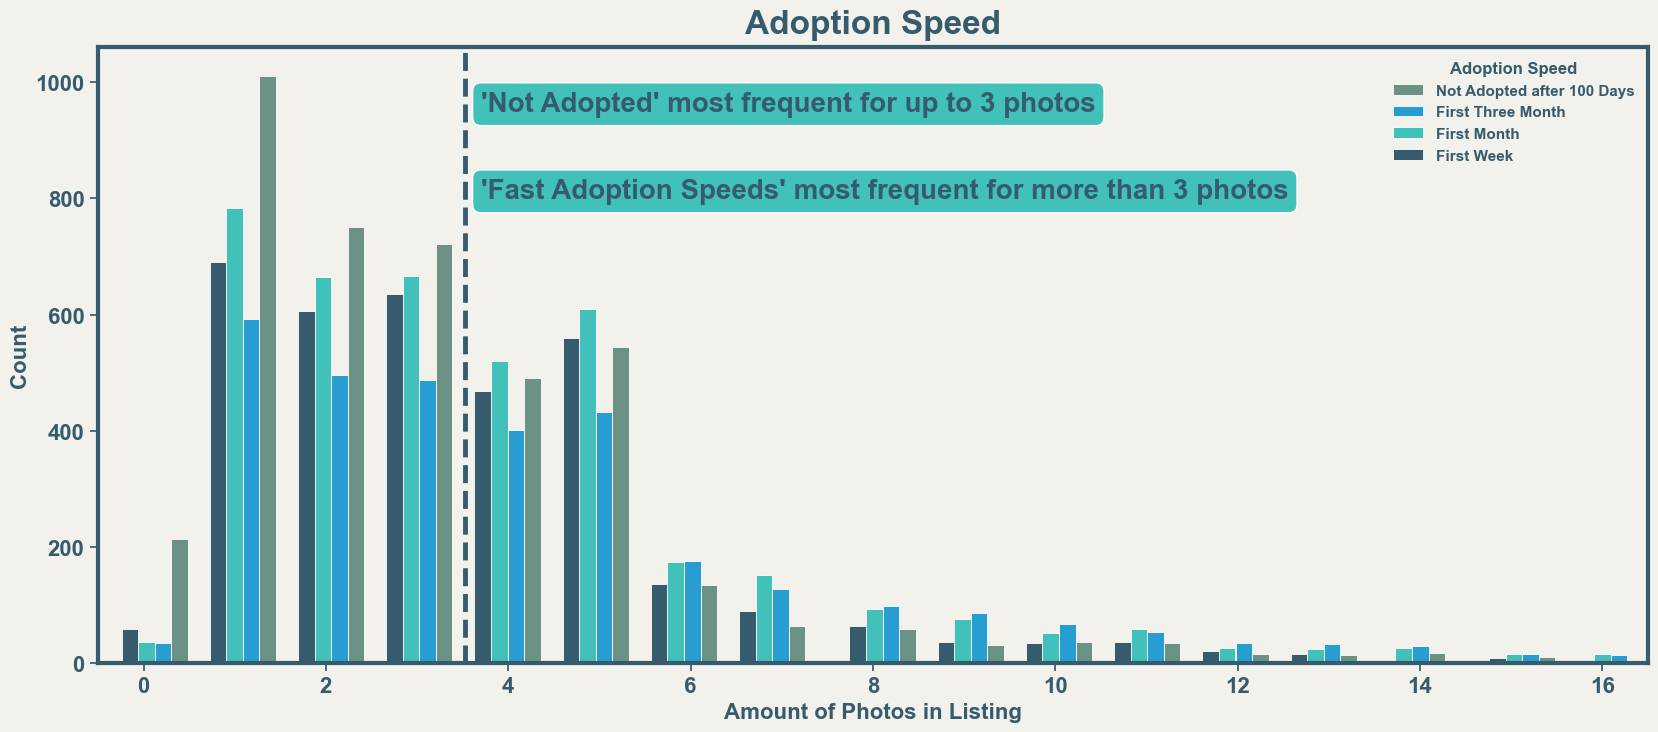

In [86]:
# histplot
bbox = dict(boxstyle="round", fc='#41c1ba')#fc="0.8") box for annotations
fig = plt.figure(figsize=(20,8))
hist = sns.histplot(
    data=df, 
    x='photoamt', 
    hue='adoptionspeed', 
    palette=['#365b6d', '#41c1ba', '#289dd2', '#6c9286'], 
    multiple='dodge', 
    alpha=1,
    shrink=3)

legend = plt.legend(title="Adoption Speed", 
                    labels = ['Not Adopted after 100 Days','First Three Month','First Month','First Week']
                    )
plt.xlabel('Amount of Photos in Listing')
plt.ylabel('Count')
plt.title('Adoption Speed', fontsize=24)
plt.xticks(ticks=np.linspace(0,18,10))
# add vertical line
hist.axvline(x=3.52, ymin=0, ymax=1070, linewidth=3.5, linestyle='dashed')
# Annotate vline
plt.annotate("'Not Adopted' most frequent for up to 3 photos", xy=(3.7, 950), bbox=bbox, fontsize=20)
plt.annotate("'Fast Adoption Speeds' most frequent for more than 3 photos", xy=(3.7, 800), bbox=bbox, fontsize=20)

#restrict x axis
plt.xlim([-0.5, 16.5])
# safe figure as...
#plt.savefig('../images/presentation/photoamt_with_line.jpg')
plt.show();

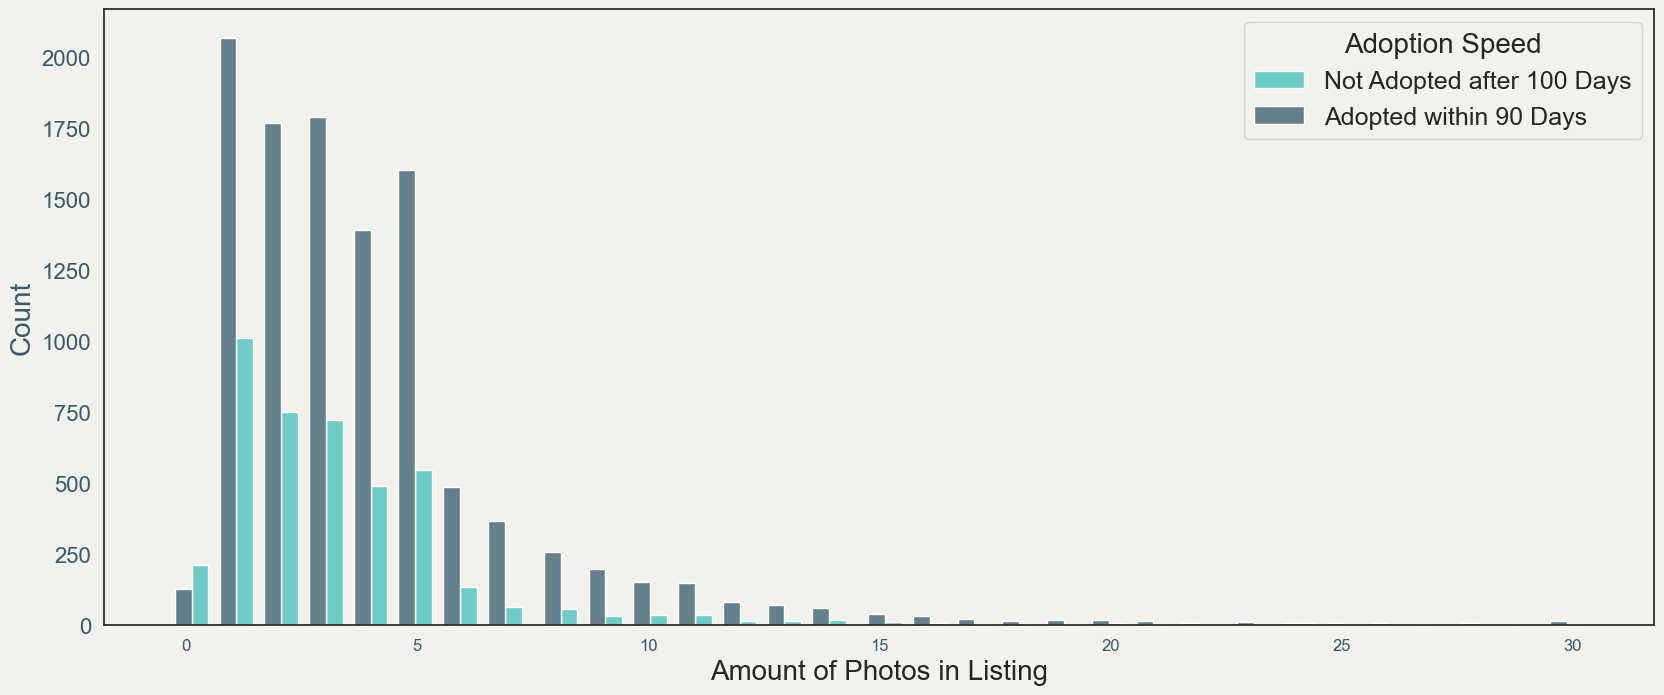

In [ ]:
# histplot
fig = plt.figure(figsize=(20,8))
hist = sns.histplot(data=df_combined, x='photoamt', hue='adoptionspeed', palette=custom_palette, multiple='dodge', shrink=3)
#, shrink=1, bins=20 )#bins = np.arange(quantile_idx-84, 1114, 28))# bins=60)#)
#multiple='stack',“layer”, “dodge”, “fill”}
#hist.axvline(x=quantile_idx, color='#671f47', linewidth=2) # '#b86a44', '#671f47', '#a22e54',  '#dabc66'
#plt.xticks(rotation=45)
#plt.subplots_adjust(top=0.90)
#add legend to plot
plt.legend(
    title='Adoption Speed',
    labels = ['Not Adopted after 100 Days','Adopted within 90 Days'],
    fontsize=18,#'x-large',
    title_fontsize=20#'xx-large'
    )
plt.xlabel('Amount of Photos in Listing', fontsize=20);
plt.ylabel('Count', fontsize=20, color='#365b6d');
#plt.title(' Model', fontsize=28, color='#365b6d', pad=60, y=0.91) 
plt.xticks(color='#365b6d',fontsize=12)
plt.yticks(color='#365b6d', fontsize=16)
#sns.lineplot(x=quantile_idx, y=[0,5])
#plt.savefig('plots/baseline_plot2_without_title.jpg')
plt.show();

In [ ]:
dxp.count(val='photoamt', data=df_combined, split='adoptionspeed', normalize='adoptionspeed', title='Adoption Rate')#, stacked=True)

TypeError: Categorical.remove_unused_categories() got an unexpected keyword argument 'inplace'

In [ ]:
dxp.hist(val='photoamt', data=df_combined, split='adoptionspeed')#, normalize='adoptionspeed', title='Adoption Rate')#, stacked=True)

TypeError: Categorical.remove_unused_categories() got an unexpected keyword argument 'inplace'

In [ ]:
dxp.count(val='adoptionspeed', data=df_combined)

TypeError: Categorical.remove_unused_categories() got an unexpected keyword argument 'inplace'

In [ ]:
dxp.bar(x='type', y='photoamt', data=df_combined, aggfunc='median')

TypeError: Categorical.remove_unused_categories() got an unexpected keyword argument 'inplace'